## **INTRODUCTION TO GOOGLE TRENDS API**

[Google Trends](https://trends.google.it/trends/?geo=IT) is a website that analyzes and lists the popular search results on Google search based on various regions and languages.

But ***what*** exactly is "Google Trends"? And why is this relevant to Data Scientists?

As [Silva et al, 2019](https://www.mdpi.com/439984) report, Google Trends is a website, and one of the largest *real time dataset*s currently available to the public [Rogers 2016](https://openknowledge.worldbank.org/handle/10986/23723), recording Google search data from 2004 to present [Choi and Varian 2012](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1475-4932.2012.00809.x), Google Trends allows one to **gauge audience&consumer search interest in brands, events, politicians** and much more.

However, instead of the raw level of queries for a given search term, it is important to note that Google Trends reports the query index, which consists in a query share [Choi and Varian 2012](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1475-4932.2012.00809.x):

\begin{equation}
\frac{Total Query Volume For Search Term In A Given Geographic Location}{Total Number Of Queries In that Region At A Point In Time}
\end{equation}

In other words, its ***normalised nature*** (which allows for more accurate comparisons over time) means that Google Trends will always show the search interest on a topic as a proportion of all searches on all topics on Google at that time and location [Rogers 2016](https://openknowledge.worldbank.org/handle/10986/23723). 
**Data quality** is another important issue, and Google Trends seeks to improve the quality of its data by excluding searches made by very few people, duplicate searches and special characters [Choi and Varian 2012](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1475-4932.2012.00809.x).

Furthermore, the query share based approach to computing Google Trends has its benefits in a world where big data and data mining have been marred by privacy issues and concerns: the data aggregation underlying Google Trends ensures the output is **anonymised** and thus no individual is identified personally [Rogers 2016](https://openknowledge.worldbank.org/handle/10986/23723).

## CONNECTING TO GOOGLE TRENDS API VIA PYTRENDS 

Thanks to the Python API **pytrends** you can interact with the Google Trends API and get the trending results from the website directly in Python. In this way, you won’t need to manually search and copy the trending results, because pytrends does the job for you.  

Note that pytrends is an **unofficial** API, that allows for automated interaction with Google Trends: it is only good until Google changes something in its backend.  
Check the [unofficial documentation](https://pypi.org/project/pytrends/) and the [GitHub of the project](https://github.com/GeneralMills/pytrends) for further informations and updates.

In [1]:
import pytrends
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq

First, we need to connect to Google via the *TrendReq* import method. Then we can start using this method to require informations and data from Google Trends.  
Some important parameters to keep in mind when using TrendReq are the following:
* ***hl*** is used to specify the language of the queries you are looking for: the default is "en-US", later in this tutorial, I will be using "IT" for "Italy";
* ***geo*** allows you to specify the region in which to look for;
* ***tz*** specifies the TimeZone Offset.
Many more are available and I encourage you to reas through the documentation.


In [2]:
pytrend = TrendReq()

## Interest by Region
One thing you might want to do is to see how popular is a term worldwide. For example, let's say that we wanted to check for the interest by region of the term "Coronavirus". 

First, we need to build a **payload** for a list of keywords we are interested in. Up to 5 terms at a time can be inserted in the list.

In [3]:
kw = ['Coronavirus']

pytrend.build_payload(kw_list=kw)

df = pytrend.interest_by_region()
df.reset_index(inplace=True)
df.head(10)

,geoName,Coronavirus
0,Afghanistan,0
1,Albania,0
2,Algeria,20
3,American Samoa,0
4,Andorra,0
5,Angola,0
6,Anguilla,0
7,Antarctica,0
8,Antigua & Barbuda,0
9,Argentina,51


Remember that values here are computed on a *scale from 0 to 100*, where 100 is assigned to the location where the keyword has the most popularity as a fraction of total searches in that location. A value of 50 signals a location where the searched term is half as popular, while a value of 0 indicates that there is not enough data on this keyword for a specific Region. 

Let's visualize the interest by country in the word "Coronavirus" today.

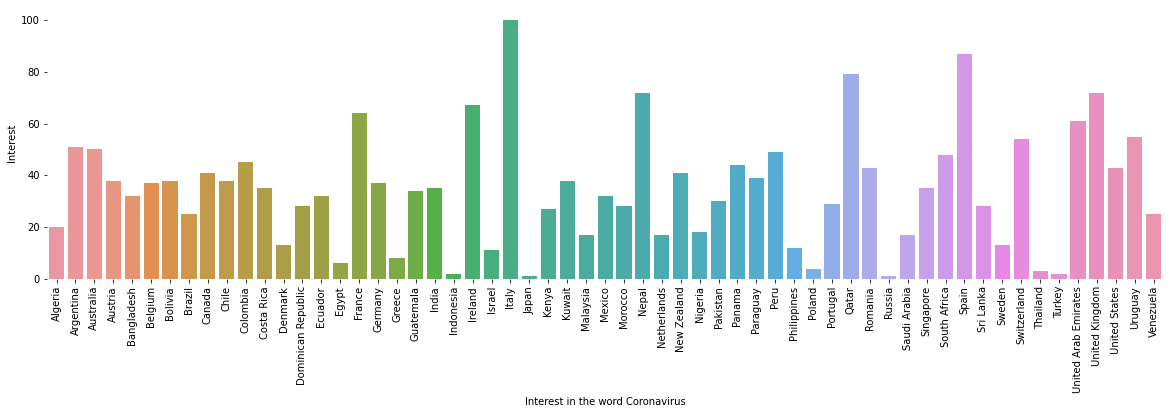

In [4]:
df = df[df['Coronavirus']!=0]
f, ax = plt.subplots(figsize=(20, 5))

# Plot the tweet volume for each trend
sns.set_color_codes('pastel')
sns.barplot(x='geoName', y=kw[0], data=df)
plt.xticks(rotation=90)

# Add a legend and informative axis label

ax.set(ylabel='Interest', xlabel=(str('Interest in the word '+kw[0])))
sns.despine(left=True, bottom=True)

## Search Trends
What if, instead of searching for the interest in a particular word by Region, we wanted to know what are the **daily Hot Trends** in that Region? The API method for this is *trending_searches()*, where the parameter *pn=* is used to specify the Region of interest: leaving it blank returns Hot Trends *worldwide*.

In [5]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='italy')
df.head(10)

,0
0,Lino Capolicchio
1,Dybala
2,Chi ha vinto La Pupa e il Secchione 2022
3,Sgarbi-Mughini
4,Papa Francesco
5,Samarate
6,Raoul Bova
7,Grizzlies Warriors
8,Alcaraz
9,Carlos Alcaraz


## Top Yearly Searches

It is also possible to get informations about what were the **trending searches in a particular year**, using the *top_charts()* method. Of course, we can also specify the country that we want trending searches for.

In [6]:
# Get Google Top Charts
df = pytrend.top_charts(2020, hl='it', geo='IT')

df.drop(columns='exploreQuery').head(10)

,title
0,Coronavirus
1,Elezioni USA
2,Classroom
3,Weschool
4,Nuovo Dpcm
5,Diego Armando Maradona
6,Kobe Bryant
7,Meet
8,Contagi
9,Protezione Civile


## Google Keyword Suggestions

When you look for interest in a topic on Google Trends, Google usually nudges you with **keywords suggestions**. You can obtain all the keyword suggestions for a given word via the *suggestions()* method.  

Let's try this for the term "Coronavirus" and see what suggestions we can obtain.

In [7]:
keywords = pytrend.suggestions(keyword='Coronavirus')

df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,COVID-19 vaccine,Vaccine
1,BNT162b2,Vaccine
2,mRNA-1273,Vaccine
3,Severe acute respiratory syndrome coronavirus 2,Virus
4,2020 coronavirus pandemic in Scotland,Topic


## Related Queries

When a user searches for a topic, he may find it interesting to look for related searches. We can look for them employing the *related_queries()* method, which returns a dictionary of queries connected to the original term.  
Remember that in Google Trends, we find *two types* of related queries:
* **Top searches** are the *most frequently searched* with the given keyword;
* **Rising searches** are the queries that had the *most significant growth* in a certain time span.

In [8]:
pytrend.build_payload(kw_list=kw)

related_queries = pytrend.related_queries() # related_queries returns a dictionary of dataframes

df = pd.DataFrame(related_queries.get('Coronavirus').get('top'))

# OR
#df = pd.DataFrame(related_queries.get(keyword).get(‘rising’))

df.head(10)

,query,value
0,coronavirus update,100
1,coronavirus cases,90
2,coronavirus news,71
3,coronavirus uk,67
4,corona,61
5,coronavirus india,47
6,coronavirus symptoms,42
7,france coronavirus,35
8,thank you coronavirus helpers,33
9,coronavirus worldometer,33


## Related Topics

You can also look for the topics related to the one you searched for using the *related_topics()* method, which again returns a dictionary of dataframes, divided by **top** and **rising**; these dictionaries contain the information on the type of topics related to the one you looked for as well as the link to the page in Google Trends.

In [9]:
pytrend.build_payload(kw_list=kw)

related_topics = pytrend.related_topics() # related_topics returns a dictionary of dataframes

df = pd.DataFrame(related_topics.get('Coronavirus').get('top'))

# OR
#df = pd.DataFrame(related_topics.get(keyword).get(‘rising’))

df.drop(columns= ['topic_mid', 'formattedValue']).head(10)

,value,hasData,link,topic_title,topic_type
0,100,True,/trends/explore?q=/g/11j2cc_qll&date=today+5-y,Coronavirus disease 2019,Disease
1,100,True,/trends/explore?q=/m/01cpyy&date=today+5-y,Coronavirus,Virus
2,4,True,/trends/explore?q=/m/03rjj&date=today+5-y,Italy,Country in Europe
3,3,True,/trends/explore?q=/m/02qbqx&date=today+5-y,Medical sign,Topic
4,3,True,/trends/explore?q=/g/11ckxx4f1g&date=today+5-y,Worldometers,Website
5,2,True,/trends/explore?q=/m/0g9pc&date=today+5-y,Virus,Infectious agent
6,2,True,/trends/explore?q=/g/11j4xt9hdf&date=today+5-y,Severe acute respiratory syndrome coronavirus 2,Virus
7,2,True,/trends/explore?q=/m/06mnr&date=today+5-y,Statistics,Discipline
8,2,True,/trends/explore?q=/g/11j8_9sv06&date=today+5-y,COVID-19 vaccine,Vaccine
9,1,True,/trends/explore?q=/g/11jg8c8t98&date=today+5-y,Worldometer COVID-19 Dashboard,Topic


## Interest in a topic in real time

The request method *realtime_trending_searches()* is used to request the trending searches in this moment in time in a given region. The output of this request is a pandas dataframe containing titles of trending searches in the region as well as the ***entity names*** asssociated with those titles.

In [10]:
realtime_df = pytrend.realtime_trending_searches(pn='IT') # leaving pn=None gives you trend worldwide

realtime_df.head(10)

,title,entityNames
0,"Giampiero Mughini, Vittorio Sgarbi, Maurizio C...","[Giampiero Mughini, Vittorio Sgarbi, Maurizio ..."
1,"Raoul Bova, Rocío Muñoz, Don Matteo, Chiara Gi...","[Raoul Bova, Rocío Muñoz, Don Matteo, Chiara G..."
2,"Nicola Gratteri, Superior Council of Magistrac...","[Nicola Gratteri, Superior Council of Magistra..."
3,"Stair of the Turks, Elon Musk","[Stair of the Turks, Elon Musk]"
4,"Piano, Milan","[Piano, Milan]"
5,"Juventus F.C., Medhi Benatia, Dušan Vlahović, ...","[Juventus F.C., Medhi Benatia, Dušan Vlahović,..."
6,"Madrid Open, ATP Tour Masters 1000, Associatio...","[Madrid Open, ATP Tour Masters 1000, Associati..."
7,"Accident, San Stino di Livenza","[Accident, San Stino di Livenza]"
8,"Association football referee, Argentina, Tifo","[Association football referee, Argentina, Tifo]"
9,"Vulvodynia, Pudendal nerve entrapment, Pudenda...","[Vulvodynia, Pudendal nerve entrapment, Pudend..."


## Interest Over Time

It is possible to obtain reports on the interest a certain term generated on Google in a given timespan, using the request method *interest_over_time()*. The timeframe of interest has to be declared into *build_payload()* and it is of course allowed to specify the language preferences and the region via *TrendReq()*

Text(0, 0.5, 'Query Index')

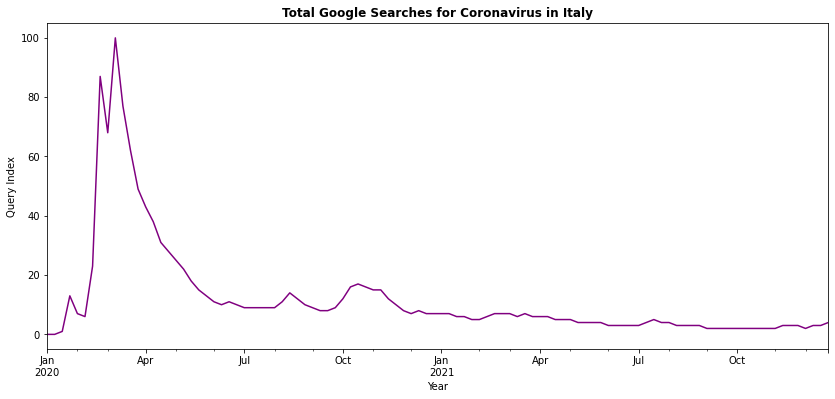

In [11]:
pytrend = TrendReq(hl='IT', geo='IT', tz=360)

pytrend.build_payload(kw_list=kw, 
                    timeframe='2020-01-01 2021-12-31')

time_df = pytrend.interest_over_time()

# creating graph
fig, ax = plt.subplots(figsize=(14, 6))
time_df['Coronavirus'].plot(color='purple')
# adding title and labels
plt.title('Total Google Searches for '+kw[0]+ ' in Italy', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Query Index')

As written before, it is possible to monitor interest over time for ***multiple terms*** (the natural limit in Google Trends is 5). Let's see how the interest in the pharmaceautical companies that developed and distributed Covid-19 vaccines evolved over time in Italy.

Text(0, 0.5, 'Query Index')

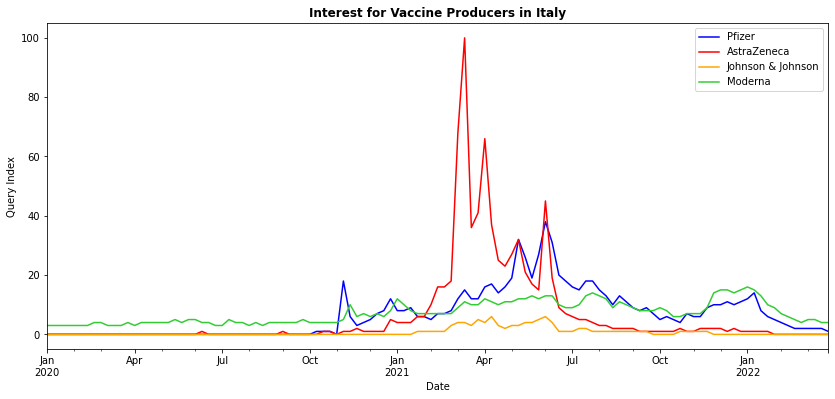

In [12]:
pytrend = TrendReq(hl='IT', geo='IT', tz=360)

kw = ['Pfizer', 'AstraZeneca', 'Johnson & Johnson', 'Moderna']
pytrend.build_payload(kw_list=kw, 
                    timeframe='2020-01-01 2022-03-31')

vac_df = pytrend.interest_over_time()

# creating graph
fig, ax = plt.subplots(figsize=(14, 6))
vac_df['Pfizer'].plot(color='blue')
vac_df['AstraZeneca'].plot(color='red')
vac_df['Johnson & Johnson'].plot(color='orange')
vac_df['Moderna'].plot(color='limegreen')
# adding legend, title and labels
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Interest for Vaccine Producers in Italy', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')

## Historical Hourly Interest

The method *get_historical_interest()* returns **historical, indexed, hourly data** for when the keyword was searched most as shown on Google Trends' Interest Over Time section. This works by sending multiple requests to Google, each retrieving one week of hourly data.  
It seems like this would be the **only** way to get historical, hourly data and it comes with the issue of being time consuming, so beware and select only the time window of interest.

In the example below, I show how the interest in the search term "Coronavirus" changed during the year 2020 in Italy, which was heavily investend and caught off-guard by the Covid-19 pandemic (as many other countries).

In [13]:
pytrend = TrendReq(hl='IT', geo='IT', tz=360) 

kw = ['Coronavirus']

search_df = pytrend.get_historical_interest(kw, year_start=2020,
                                             month_start=1, day_start=1,
                                             hour_start=0, year_end=2020,
                                             month_end=12, day_end=31, hour_end=0,
                                             cat=0, geo='', gprop='', sleep=60)

Text(0.5, 1.0, 'Hourly Query Searches for "Coronavirus" in Italy in 2020')

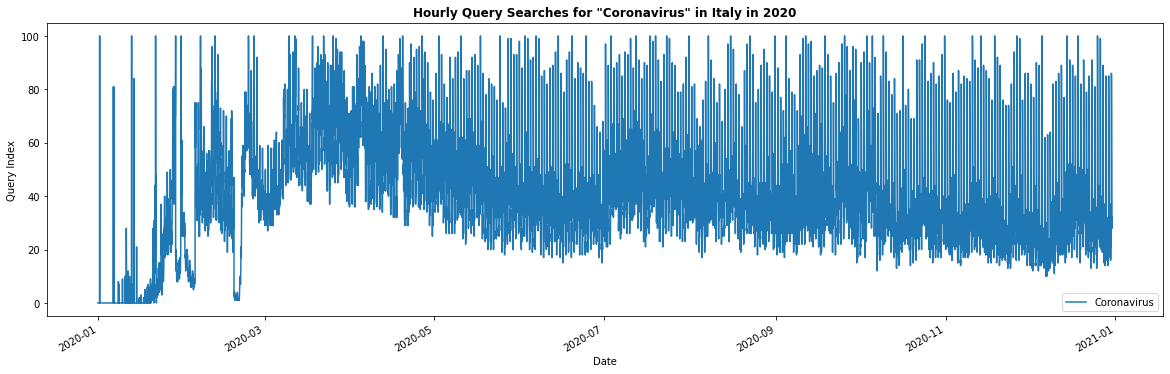

In [14]:
search_df.plot(figsize=(20, 6))
plt.xlabel('Date')
plt.ylabel('Query Index')
plt.title('Hourly Query Searches for "Coronavirus" in Italy in 2020', fontweight='bold')

## Closing Remarks

In this notebook, I made references to scientific literature on Google Trends as well as the documentation of the pytrends API. This notebook aimed to deepen fellow Data Scientists knowledge on this huge source of information that is Google Trends, as well as giving a little introduction on how to interact with the website directly from Python. Further tutorials on the subject could cover topics such as time series forecasting of interest in Trends and sentiment analysis of trending topics.